# In Vivo Base Editing Screen Validation and Focused Library Design 

This script generates an ABE validation library and a CBE focused library for B-ALL in-vivo screen.

Author: Kexin Dong  
Create Date: Aug 18, 2025  
Last Update: Aug 21, 2025  
Reference: https://github.com/samgould2/B-ALL-in-vivo-base-editing  

# ABE Validation Library. 
- 45% targets
    - min edit = 10
    - FDR cutoff = .1
    - LFC cut off (in any tissue/ in vitro) = 1. 
- 55% controls
    - non-targeting controls (50%)
        - include all original NTs
    - safe-targeting controls (5%)

# CBE Focused Library. 
- 65% targets
    - Pax5, Trp53, Cttnb1 
    - leukemia-relavant genes 
    - truncation mutation in targeting genes
- 35% controls
    - non-targeting controls (25%)
        - include all original NTs 
    - safe-targeting controls (5%)
    - truncation mutation in essential genes (10%)

In [5]:
from pegg import base
from pegg import prime
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import bioh2m as h2m
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# ABE - 45% targets
    - min edit = 10
    - FDR cutoff = .1
    - LFC cut off (in any tissue/ in vitro) = 1. 

In [6]:
ABE_LFC = pd.read_csv('/Users/kexindong/Documents/GitHub/SG-B-ALL-in-vivo-base-editing/ABE_LFC_FDR_df.csv')
ABE_LFC['Editor']='ABE'
ABE_LFC_target = ABE_LFC[ABE_LFC['classification'] == 'targeting guide'].reset_index(drop=True)

In [7]:
min_edit = 10
FDR_cutoff = .1
LFC_cutoff = 1
names = ['d15','spleen', 'bonemarrow', 'meninges']
def sub_library(row, min_edit, FDR_cutoff, LFC_cutoff):
    valid = False
    if row['target_base_edit_perc'] >= min_edit:
        for name in names:
            if (row[f'LFC_median_{name}'] >= LFC_cutoff) & (row[f'FDR_{name}'] <= FDR_cutoff):
                valid = True
    return valid

ABE_LFC_target['valid'] = ABE_LFC_target.apply(lambda row: sub_library(row, min_edit, FDR_cutoff, LFC_cutoff), axis=1)
ABE_LFC_valid = ABE_LFC_target[ABE_LFC_target['valid']]

In [8]:
len(ABE_LFC_valid)

170

In [9]:
# retrieve the library data of this subset from the riginal library
original = pd.read_csv('/Users/kexindong/Documents/GitHub/SG-B-ALL-in-vivo-base-editing/MBESv2_CORRECTED.csv')
original_abe = original[original['Editor'] == 'ABE']
original_cbe = original[original['Editor'] == 'CBE']
original_abe_edit = original_abe[original_abe['classification'] == 'targeting guide']
original_cbe_edit = original_cbe[original_cbe['classification'] == 'targeting guide']

In [10]:
original_edit = original_abe[original_abe['classification'] == 'targeting guide']

In [11]:
valid_abe_edit = original_abe_edit[original_abe_edit['gRNA_id'].isin(ABE_LFC_valid['gRNA_id'])]
valid_abe_edit

,gRNA_id,mutation_idx,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,...,contains_polyT_terminator,contains_RE_site,num_potential_vars,classification,Genome_version,Hamming_BC,Pool,gRNA_oligo,gene_name_m_corrected,legacy
1,gRNA_2,0,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133730186.0,...,False,False,1.0,targeting guide,GrCm39,CCTATACCCGAATCT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGTTCTAA...,Abl1,False
84,gRNA_85,68,AKT1,ENSG00000142208.11,ENST00000349310.3,chr14,13.0,-,True,105239419.0,...,False,False,1.0,targeting guide,GrCm39,TGCAAGCATTCATGT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGAGGACA...,Akt1,False
870,gRNA_871,710,ARID2,ENSG00000189079.11,ENST00000334344.6,chr12,21.0,+,True,46246543.0,...,False,False,1.0,targeting guide,GrCm39,ATACGTGTTAGTTGC,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGCCAACA...,Arid2,False
894,gRNA_895,737,ARID5B,ENSG00000150347.10,ENST00000279873.7,chr10,10.0,+,True,63852298.0,...,False,False,1.0,targeting guide,GrCm39,TCAACTAGATTCCGA,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGCCGGGA...,Arid5b,False
895,gRNA_896,737,ARID5B,ENSG00000150347.10,ENST00000279873.7,chr10,10.0,+,True,63852298.0,...,False,False,1.0,targeting guide,GrCm39,TCTCTAGACTGTGCT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGGGGAAA...,Arid5b,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,gRNA_12602,10442,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10.0,-,True,7577144.0,...,False,False,1.0,targeting guide,GrCm39,CGCTTGATCAATGTA,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGCCAGAA...,Trp53,False
12603,gRNA_12604,10448,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10.0,-,True,7577100.0,...,False,False,1.0,targeting guide,GrCm39,CCAGGCGAATACTCT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGCTGGGA...,Trp53,False
12651,gRNA_12652,10492,TP53BP1,ENSG00000067369.9,ENST00000263801.3,chr15,27.0,-,True,43748093.0,...,False,False,1.0,targeting guide,GrCm39,GTGCAGAGTCCGATG,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGTTCTAG...,Trp53bp1,False
12830,gRNA_12831,10621,TSC1,ENSG00000165699.9,ENST00000298552.3,chr9,21.0,-,True,135772005.0,...,False,False,1.0,targeting guide,GrCm39,TGAGTGCATTGGAGT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGAGGCAG...,Tsc1,False


In [12]:
print(len(valid_abe_edit))

170


In [13]:
# add truncation mutation of these genes
abe_gene_mouse = list(valid_abe_edit['gene_name_m'].unique())
print(len(abe_gene_mouse))

90


# CBE Focused Library - 65% targets
    - Pax5, Trp53, Cttnb1
    - Leukemia-relavant genes 
    - truncation mutation in targeting genes (5%)

## Source I: All CBE guides targeting Pax5, Trp53, and Ctnnb1. 

In [14]:
# abe
# safe-target: 5%
desired_frac = .65
total_num = 1200
num_target_cbe = int(total_num*desired_frac)
print(num_target_cbe)

780


In [15]:
compact_cbe_1 = original_cbe_edit[original_cbe_edit['gene_name_m'].isin(['Pax5', 'Ctnnb1', 'Trp53'])]
compact_cbe_1['gene_name_m'].value_counts()

gene_name_m
Trp53     109
Ctnnb1     52
Pax5       39
Name: count, dtype: int64

In [16]:
print(len(compact_cbe_1))

200


## Source II: leukemia-relavent genes. 

See: 04_leukemia_CBE_library_design_JA/04_leukemia_CBE_library_design_JA.ipynb  

In [17]:
df_mutation_aacr = pd.read_csv('/Users/kexindong/Documents/GitHub/Database/PublicDatabase/AACR-GENIE/v17.0/data_mutations_extended.txt',
                          header=0, sep='\t', comment="#", 
                          na_values=['Not Applicable', 'NA', 'NULL', '-', 'None', ''])
df_pts = pd.read_csv('/Users/kexindong/Documents/GitHub/Database/PublicDatabase/AACR-GENIE/v17.0/data_clinical_patient.txt', header=0, sep='\t', comment="#", na_values = 'Not Applicable')
df_sample = pd.read_csv('/Users/kexindong/Documents/GitHub/Database/PublicDatabase/AACR-GENIE/v17.0/data_clinical_sample.txt', header=0, sep='\t', comment="#", na_values = 'Not Applicable')

In [18]:
sample_id_leukemia = df_sample[df_sample['CANCER_TYPE'].isin(['Leukemia', 'B-Lymphoblastic Leukemia/Lymphoma', 'T-Lymphoblastic Leukemia/Lymphoma'])]['SAMPLE_ID'].unique()
df_mutation_aacr_leukemia = df_mutation_aacr[df_mutation_aacr['Tumor_Sample_Barcode'].isin(sample_id_leukemia)].reset_index(drop=True)
# df_mutation_aacr_leukemia = df_mutation_aacr_leukemia[df_mutation_aacr_leukemia['Variant_Type']== 'SNP'].reset_index(drop=True)
df_mutation_aacr_leukemia

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,NRAS,4893.0,JHU,GRCh37,1,115256530,115256530,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.709,deleterious,0.01,NaN,NaN,5703.0,SUCCESS,False
1,NRAS,4893.0,JHU,GRCh37,1,115256529,115256529,+,missense_variant,Missense_Mutation,...,PASS,benign,0.251,tolerated,0.06,NaN,NaN,5686.0,SUCCESS,False
2,TP53,7157.0,JHU,GRCh37,17,7578433,7578433,+,stop_gained,Nonsense_Mutation,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,975.0,SUCCESS,False
3,NPM1,4869.0,JHU,GRCh37,5,170837543,170837544,+,frameshift_variant,Frame_Shift_Ins,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,1036.0,SUCCESS,False
4,NPM1,4869.0,JHU,GRCh37,5,170837544,170837545,+,frameshift_variant,Frame_Shift_Ins,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,1084.0,SUCCESS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,PALB2,79728.0,PROV,GRCh37,16,23614913,23614913,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.861,deleterious,0.00,NaN,NaN,812.0,SUCCESS,False
36270,JAK3,3718.0,PROV,GRCh37,19,17942541,17942541,+,missense_variant,Missense_Mutation,...,PASS,benign,0.015,deleterious,0.00,NaN,NaN,801.0,SUCCESS,False
36271,ERCC1,2067.0,PROV,GRCh37,19,45918128,45918128,+,missense_variant,Missense_Mutation,...,PASS,benign,0.043,tolerated,0.12,NaN,NaN,692.0,SUCCESS,False
36272,TET2,54790.0,PROV,GRCh37,4,106157647,106157647,+,missense_variant,Missense_Mutation,...,PASS,benign,0.000,tolerated,1.00,NaN,NaN,1226.0,SUCCESS,False


In [19]:
df_leukemia = df_mutation_aacr_leukemia[['Hugo_Symbol', 'Entrez_Gene_Id', 'Chromosome', 'Start_Position', 'End_Position', 'Reference_Allele', 'Tumor_Seq_Allele2', 'Variant_Type', 'Variant_Classification', 'Strand', 'Tumor_Sample_Barcode']].drop_duplicates().reset_index(drop=True).copy()
df_leukemia = df_leukemia[df_leukemia['Chromosome']!= 'MT'].reset_index(drop=True)
df_leukemia = df_leukemia[['Hugo_Symbol', 'Entrez_Gene_Id', 'Chromosome', 'Start_Position', 'End_Position', 'Reference_Allele', 'Tumor_Seq_Allele2', 'Variant_Type', 'Variant_Classification', 'Strand']].value_counts().reset_index()
df_leukemia['Hugo_Symbol'].value_counts()

Hugo_Symbol
TET2      405
TP53      389
DNMT3A    295
RUNX1     180
KMT2D     158
         ... 
VTCN1       1
RPS26       1
CD22        1
CD276       1
XIAP        1
Name: count, Length: 848, dtype: int64

In [20]:
leukemia_count =df_leukemia['Hugo_Symbol'].value_counts().reset_index()
leukemia_count.columns = ['Hugo_Symbol', 'Count']
leukemia_genes = leukemia_count[leukemia_count['Count'] > 30].sort_values(by='Count', ascending=False)['Hugo_Symbol'].to_list()

In [21]:
def random_subsample_by_proportion(df: pd.DataFrame, hugo_symbol_col: str, target_size: int, random_state: int = None) -> pd.DataFrame:
    """
    Randomly subsamples guides for each hugo_symbol from a DataFrame,
    maintaining the original proportion of guides per gene.

    Args:
        df (pd.DataFrame): The input DataFrame containing guide information.
        hugo_symbol_col (str): The name of the column containing gene symbols (e.g., 'hugo_symbol').
        target_size (int): The total number of guides to be randomly selected.
        random_state (int, optional): A seed for the random number generator to ensure reproducibility.

    Returns:
        pd.DataFrame: A new DataFrame containing the randomly selected guides.
    """
    if hugo_symbol_col not in df.columns:
        raise ValueError(f"The specified column '{hugo_symbol_col}' does not exist in the DataFrame.")

    gene_counts = df[hugo_symbol_col].value_counts()
    total_guides = len(df)
    gene_proportions = gene_counts / total_guides
    target_counts = (gene_proportions * target_size).round().astype(int)

    total_after_rounding = target_counts.sum()
    diff = target_size - total_after_rounding
    
    if diff != 0:
        # Adjust the difference by randomly adding or subtracting 1 until the total matches.
        # This method fairly distributes the rounding error.
        genes_to_adjust = target_counts.nlargest(abs(diff)).index if diff > 0 else target_counts.nsmallest(abs(diff)).index
        target_counts.loc[genes_to_adjust] += np.sign(diff)

    subsampled_df_list = []
    
    if random_state is not None:
        np.random.seed(random_state)
    
    for gene, count in target_counts.items():
        gene_guides = df[df[hugo_symbol_col] == gene]
        if count > 0:
            sampled_guides = gene_guides.sample(n=min(count, len(gene_guides)), random_state=random_state, replace=False)
            subsampled_df_list.append(sampled_guides)
    if not subsampled_df_list:
        return pd.DataFrame(columns=df.columns)
    
    final_df = pd.concat(subsampled_df_list)
    final_df = final_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    final_df = final_df.sort_values(by=hugo_symbol_col).reset_index(drop=True)
    return final_df

In [22]:
compact_cbe_2 = original_cbe_edit[original_cbe_edit['gene_name_h'].isin(set(leukemia_genes)-set(['PAX5', 'CTNNB1', 'TP53']))].reset_index(drop=True)
print(len(compact_cbe_2))

3377


## Source III: truncation mutations of targeted genes. 
see: https://docs.google.com/document/d/199N3ElS1E_PPtHNVgLF9Oqrs_R-HUUbhcXldPUKNOyE/preview?tab=t.0

In [23]:
# design a function to generate BE-compatible truncation mutations in any genes in mouse

## step 1: get the complete transcript of the gene and chromosome location of each neuclotide in the transcript
## step 2: scan for codons that can be edited into stop codons by ABE/CBE/ABE+CBE
## step 3: output the mutation in a format of dataframe with columns: Hugo_Symbol, Start_Position, End_Position, Variant_Type, Reference_Allele, `Tumor_Seq_Allele2`, Chromosome

def generate_truncation_mutations(list_of_genes, records, index_list, db, species='h', editor='ABE+CBE', ver=37, nonstop_size=300):
    """
        Generate truncation mutations for a list of genes for a given species, 
        and output a DataFrame containing a comprehensive report.

        This function identifies potential nonsense mutation sites by iterating through the coding sequence 
        and checking which codons can be converted into stop codons by ABE or CBE.

        Args:
            list_of_genes (list): List of gene names.
            records (list): Reference genome records loaded by h2m.genome_loader.
            index_list (list): Index list of chromosomes loaded by h2m.genome_loader.
            db (gffutils.FeatureDB): Gene annotation database loaded by h2m.anno_loader.
            species (str): 'h' for human or 'm' for mouse. Defaults to 'h'.
            editor (str): Type of base editor ('ABE', 'CBE', or 'ABE+CBE'). Defaults to 'ABE+CBE'.
            ver (int): Human genome assembly version (37 or 38). Required for human species.
            nonstop_size (int): Length of nucleotides included after the stop codon.

        Returns:
            pd.DataFrame: A DataFrame containing a comprehensive report for each mutation.
        """
    
    abe_changes = {'A': 'G', 'T': 'C'}
    cbe_changes = {'C': 'T', 'G': 'A'}
    
    if species not in ['h', 'm']:
        raise ValueError("Error: species must be 'h' for human or 'm' for mouse.")
    if species == 'h' and ver not in [37, 38]:
        raise ValueError("Error: For human species, 'ver' must be 37 or 38.")

    all_results = []

    for gene_name in list_of_genes:
        # print(f"--- DEBUG: Starting to process gene: {gene_name} ---")
        
        try:
            if species == 'h':
                gene_info = h2m.get_tx_id(gene_name, species, ver=ver, show=False)
            else:
                gene_info = h2m.get_tx_id(gene_name, species, show=False)

            if not gene_info:
               #  print(f"--- DEBUG: No gene info for {gene_name}, skipping. ---")
                continue

            tx_id = gene_info[3]
            # print(f"--- DEBUG: Retrieved canonical transcript ID: {tx_id} ---")
            
            gene_details = h2m.GetTx(records, index_list, db, tx_id, species, ver, nonstop_size=nonstop_size)
            strand, gene_id, gene_name_full, chr_id, n_exon, gene_seq, gene_index, gene_region_anno, gene_region_idx, extron_list = gene_details
            
            # print(f"--- DEBUG: Gene sequence (first 20 chars): {str(gene_seq)[:20]}, type: {type(gene_seq)} ---")
            
            condition = lambda anno_list, condition_list: [x for x in range(len(anno_list)) if anno_list[x] in condition_list]
            set_of_cds_indices = set(condition(gene_region_anno, ['E','S','3']))
            
            cds_seq = h2m.Splicing(gene_seq, set_of_cds_indices)
            cds_tx_indices = h2m.Splicing_idx(gene_index, set_of_cds_indices)
            cds_region_idx = h2m.Splicing_idx(gene_region_idx, set_of_cds_indices)
            
            # print(f"--- DEBUG: CDS sequence (first 20 chars): {str(cds_seq)[:20]}, type: {type(cds_seq)} ---")
            # print(f"--- DEBUG: CDS tx indices (first 5): {cds_tx_indices[:5]}, type: {type(cds_tx_indices)} ---")
            
            if not cds_seq:
                # print(f"--- DEBUG: No CDS found for {gene_name}, skipping. ---")
                continue
            
            for i in range(0, len(cds_seq), 3):
                codon = str(cds_seq[i:i+3])
                if len(codon) < 3: continue

                changes_to_check = {}
                if 'ABE' in editor: changes_to_check.update(abe_changes)
                if 'CBE' in editor: changes_to_check.update(cbe_changes)

                for pos_in_codon, base in enumerate(codon):
                    if base in changes_to_check:
                        mut_base = changes_to_check[base]
                        new_codon_list = list(codon)
                        new_codon_list[pos_in_codon] = mut_base
                        new_codon = ''.join(new_codon_list)
                        
                        if new_codon in h2m.standard_table.stop_codons:
                            # print(f"--- DEBUG: Found potential truncation mutation at codon: {codon}, resulting in: {new_codon} ---")

                            tx_coord = i + pos_in_codon
                            start_pos_g = cds_tx_indices[tx_coord]
                            end_pos_g = start_pos_g
                            
                            # print(f"--- DEBUG: Genomic coordinates for mutation: {start_pos_g}, {end_pos_g} ---")
                            
                            if strand == '-': start_pos_g, end_pos_g = end_pos_g, start_pos_g
                            
                            ref_seq = base
                            alt_seq = mut_base

                            tx_change = h2m.get_tx_change(tx_id, tx_coord, tx_coord, ref_seq, alt_seq)
                            
                            p_change = f"p.{h2m.Translate(codon)[0]}{tx_coord // 3 + 1}*"
                            
                            classification = 'Nonsense'
                            
                            try:
                                exon_raw = cds_region_idx[tx_coord]
                                exon = ','.join(list(set([str(exon_raw)])))
                            except TypeError:
                                exon = str(cds_region_idx[tx_coord])

                            type_ = 'SNP'
                            
                            from Bio import Seq
                            if strand == '-':
                                ref_seq = str(Seq.Seq(ref_seq).reverse_complement())
                                alt_seq = str(Seq.Seq(alt_seq).reverse_complement())

                            all_results.append({
                                f'gene_name_{species}': gene_name_full,
                                f'gene_id_{species}': gene_id,
                                f'tx_id_{species}': tx_id,
                                f'chr_{species}': chr_id,
                                f'exon_num_{species}': n_exon,
                                f'strand_{species}': strand,
                                f'type_{species}': type_,
                                f'classification_{species}': classification,
                                f'exon_{species}': exon,
                                f'start_{species}': start_pos_g,
                                f'end_{species}': end_pos_g,
                                f'ref_seq_{species}': ref_seq,
                                f'alt_seq_{species}': alt_seq,
                                f'HGVSc_{species}': tx_change,
                                f'HGVSp_{species}': p_change,
                                'Editor': 'ABE' if base in ['A', 'T'] else 'CBE'
                            })
                                
        except Exception as e:
            print(f"--- ERROR: An exception occurred while processing {gene_name}: {e} ---")
            continue

    if not all_results:
        return pd.DataFrame()

    mutations_df = pd.DataFrame(all_results)
    mutations_df = mutations_df.drop_duplicates().reset_index(drop=True)
    mutations_df['index'] = mutations_df.index
    return mutations_df

In [24]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)
chrom_dict, i = prime.genome_loader(path_m_ref)

In [25]:
compact_target = pd.concat([compact_cbe_1, compact_cbe_2])
target_truncation_included = compact_target[compact_target['classification_m'] == 'Nonsense']['gene_name_m'].unique().tolist()
target_truncation_included
target_truncation_unincluded = list(set(compact_target['gene_name_m'].unique()) - set(target_truncation_included))
len(target_truncation_unincluded)

17

In [26]:
#predict truncation mutations that are amenable by CBE
target_truncs = generate_truncation_mutations(target_truncation_unincluded, records_m, index_list_m, db_m, species = 'm',editor='CBE')
target_truncs

,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,Editor,index
0,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_1,124045238,124045238,G,A,ENSMUST00000035495.15:c.55C>T,p.R19*,CBE,0
1,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_1,124045228,124045228,C,T,ENSMUST00000035495.15:c.65G>A,p.W22*,CBE,1
2,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_1,124045227,124045227,C,T,ENSMUST00000035495.15:c.66G>A,p.W22*,CBE,2
3,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_2,124044893,124044893,G,A,ENSMUST00000035495.15:c.97C>T,p.Q33*,CBE,3
4,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_2,124044869,124044869,G,A,ENSMUST00000035495.15:c.121C>T,p.Q41*,CBE,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793756,78793756,C,T,ENSMUST00000025430.11:c.9423G>A,p.*3141*,CBE,2683
2684,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793716,78793716,G,A,ENSMUST00000025430.11:c.9463C>T,p.Q3155*,CBE,2684
2685,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793695,78793695,G,A,ENSMUST00000025430.11:c.9484C>T,p.Q3162*,CBE,2685
2686,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793680,78793680,G,A,ENSMUST00000025430.11:c.9499C>T,p.Q3167*,CBE,2686


In [27]:
# generate gRNAs for these mutations
target_truncs['Start_Position'] = [int(i) for i in target_truncs['start_m']]
target_truncs['End_Position'] = [int(i) for i in target_truncs['end_m']]
target_truncs['Variant_Type'] = target_truncs['type_m']
target_truncs['Reference_Allele'] = target_truncs['ref_seq_m']
target_truncs['Tumor_Seq_Allele2'] = target_truncs['alt_seq_m']
target_truncs['Chromosome'] = [i[3:] for i in target_truncs['chr_m']]
target_truncs

,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,start_m,...,HGVSc_m,HGVSp_m,Editor,index,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Chromosome
0,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_1,124045238,...,ENSMUST00000035495.15:c.55C>T,p.R19*,CBE,0,124045238,124045238,SNP,G,A,8
1,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_1,124045228,...,ENSMUST00000035495.15:c.65G>A,p.W22*,CBE,1,124045228,124045228,SNP,C,T,8
2,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_1,124045227,...,ENSMUST00000035495.15:c.66G>A,p.W22*,CBE,2,124045227,124045227,SNP,C,T,8
3,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_2,124044893,...,ENSMUST00000035495.15:c.97C>T,p.Q33*,CBE,3,124044893,124044893,SNP,G,A,8
4,Fanca,ENSMUSG00000032815.17,ENSMUST00000035495.15,chr8,43,-,SNP,Nonsense,E_2,124044869,...,ENSMUST00000035495.15:c.121C>T,p.Q41*,CBE,4,124044869,124044869,SNP,G,A,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793756,...,ENSMUST00000025430.11:c.9423G>A,p.*3141*,CBE,2683,78793756,78793756,SNP,C,T,18
2684,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793716,...,ENSMUST00000025430.11:c.9463C>T,p.Q3155*,CBE,2684,78793716,78793716,SNP,G,A,18
2685,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793695,...,ENSMUST00000025430.11:c.9484C>T,p.Q3162*,CBE,2685,78793695,78793695,SNP,G,A,18
2686,Setbp1,ENSMUSG00000024548.12,ENSMUST00000025430.11,chr18,5,-,SNP,Nonsense,-3,78793680,...,ENSMUST00000025430.11:c.9499C>T,p.Q3167*,CBE,2686,78793680,78793680,SNP,G,A,18


In [28]:
target_truncs_gRNA_NG = base.run_base(target_truncs, 
                    input_format='cBioPortal', 
                    chrom_dict=chrom_dict,
                    PAM='NG',
                    filtration = 'CBE',
                    ideal_edit_window=[4,8],
                    proto_size = 19,
                    before_proto_context=10,
                    sensor_length=42, 
                    RE_sites=["CGTCTC", "GAATTC"]
                    )

In [29]:
target_truncs_gRNA_NG.to_csv("target_truncs_gRNA_NG.csv", index=False)

In [30]:
def random_subsample_by_counts(df: pd.DataFrame, hugo_symbol_col: str, gene_counts: dict, random_state: int = None) -> pd.DataFrame:
    """
    Randomly subsamples a specified number of guides for each gene from a DataFrame.

    This function is useful when you need to select a non-proportional, specific number of
    guides for each gene, such as for creating balanced control groups.

    Args:
        df (pd.DataFrame): The input DataFrame containing guide information.
        hugo_symbol_col (str): The name of the column containing gene symbols (e.g., 'hugo_symbol').
        gene_counts (dict): A dictionary mapping gene symbols to the number of guides to sample.
        random_state (int, optional): A seed for the random number generator to ensure reproducibility.

    Returns:
        pd.DataFrame: A new DataFrame containing the randomly selected guides.
    """
    import warnings

    if hugo_symbol_col not in df.columns:
        raise ValueError(f"The specified column '{hugo_symbol_col}' does not exist in the DataFrame.")

    df_genes = set(df[hugo_symbol_col].unique())
    dict_genes = set(gene_counts.keys())
    
    missing_in_df = dict_genes - df_genes
    if missing_in_df:
        warnings.warn(f"The following genes were found in the `gene_counts` dictionary but not in the DataFrame and will be skipped: {missing_in_df}")

    # 3. Set the random seed for reproducibility.
    if random_state is not None:
        np.random.seed(random_state)
    
    # 4. Perform random sampling for each gene.
    subsampled_df_list = []
    
    for gene, count in gene_counts.items():
        # Get all guides for the current hugo_symbol.
        gene_guides = df[df[hugo_symbol_col] == gene]
        
        if len(gene_guides) < count:
            warnings.warn(f"Only found {len(gene_guides)} guides for gene '{gene}', but requested to sample {count}. All available guides will be used.")
            sampled_guides = gene_guides
        else:
            # Randomly sample the specified number of guides.
            if count > 0:
                sampled_guides = gene_guides.sample(n=count, random_state=random_state, replace=False)
            else:
                continue
        subsampled_df_list.append(sampled_guides)
            
    # 5. Concatenate all sampled results and shuffle them.
    if not subsampled_df_list:
        return pd.DataFrame(columns=df.columns)
    
    final_df = pd.concat(subsampled_df_list)
    final_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    final_df = final_df.sort_values(by=hugo_symbol_col).reset_index(drop=True)
    return final_df

In [31]:
# only keep gRNAs targeting the CDS
truncs_cds_gRNA_NG = target_truncs_gRNA_NG[[str(x)[0]=='E' for x in target_truncs_gRNA_NG['exon_m']]].reset_index(drop=True)
#filtration of raw results
gRNA_ideal = truncs_cds_gRNA_NG[truncs_cds_gRNA_NG['Ideal_Edit_Window']==True] #filter out non ideal edit window
#filter out polyT containing guides/sensors
gRNA_ideal = gRNA_ideal[gRNA_ideal['contains_polyT_terminator']==False]
#filter out Esp3I and EcoRI containing guides/sensors
gRNA_ideal = gRNA_ideal[gRNA_ideal['contains_RE_site']==False]

gRNA_ideal = gRNA_ideal.reset_index().drop(columns = ['index', 'level_0'])

compact_cbe_3 = random_subsample_by_counts(gRNA_ideal, 'gene_name_m', dict(zip(gRNA_ideal['gene_name_m'].unique(), [3]*len(gRNA_ideal['gene_name_m'].unique()))), random_state=42)
len(compact_cbe_3)

51

In [32]:
compact_cbe_2 = random_subsample_by_proportion(compact_cbe_2, 'gene_name_h', int(num_target_cbe-len(compact_cbe_1)-len(compact_cbe_3)), random_state=42)

In [33]:
compact_cbe_3['newly_added'] = True

In [34]:
len(compact_cbe_2)

531

# CBE - 10% essential truncation. 

see: https://docs.google.com/document/d/199N3ElS1E_PPtHNVgLF9Oqrs_R-HUUbhcXldPUKNOyE/preview?tab=t.0

In [35]:
# ess-trunc: 10%
desired_frac = .1
target_frac = .65
num = num_target_cbe
num_et_cbe = int((num*desired_frac)/target_frac)

print(num_et_cbe)

120


In [36]:
essential_genes_mouse = ['Rpa3', 'Pcna','Dbr1','Plk1','Rpl3','Gapdh','Kif11','Psmb1','Eef2','Polr2b']

In [37]:
#predict truncation mutations that are amenable by CBE
et = generate_truncation_mutations(essential_genes_mouse, records_m, index_list_m, db_m, species = 'm',editor='CBE')
et

,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,Editor,index
0,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_1,8259083,8259083,G,A,ENSMUST00000012627.5:c.16C>T,p.Q6*,CBE,0
1,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_1,8259044,8259044,G,A,ENSMUST00000012627.5:c.55C>T,p.Q19*,CBE,1
2,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_4,8256200,8256200,G,A,ENSMUST00000012627.5:c.331C>T,p.Q111*,CBE,2
3,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_4,8256176,8256176,G,A,ENSMUST00000012627.5:c.355C>T,p.Q119*,CBE,3
4,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,-1,8256166,8256166,C,T,ENSMUST00000012627.5:c.365G>A,p.*122*,CBE,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497254,77497254,C,T,ENSMUST00000031167.6:c.3763C>T,p.Q1255*,CBE,493
494,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497274,77497274,G,A,ENSMUST00000031167.6:c.3783G>A,p.*1261*,CBE,494
495,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497288,77497288,G,A,ENSMUST00000031167.6:c.3797G>A,p.*1266*,CBE,495
496,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497301,77497301,G,A,ENSMUST00000031167.6:c.3810G>A,p.*1270*,CBE,496


In [38]:
# generate gRNAs for these mutations
et['Start_Position'] = [int(i) for i in et['start_m']]
et['End_Position'] = [int(i) for i in et['end_m']]
et['Variant_Type'] = et['type_m']
et['Reference_Allele'] = et['ref_seq_m']
et['Tumor_Seq_Allele2'] = et['alt_seq_m']
et['Chromosome'] = [i[3:] for i in et['chr_m']]
et

,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,start_m,...,HGVSc_m,HGVSp_m,Editor,index,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Chromosome
0,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_1,8259083,...,ENSMUST00000012627.5:c.16C>T,p.Q6*,CBE,0,8259083,8259083,SNP,G,A,6
1,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_1,8259044,...,ENSMUST00000012627.5:c.55C>T,p.Q19*,CBE,1,8259044,8259044,SNP,G,A,6
2,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_4,8256200,...,ENSMUST00000012627.5:c.331C>T,p.Q111*,CBE,2,8256200,8256200,SNP,G,A,6
3,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,E_4,8256176,...,ENSMUST00000012627.5:c.355C>T,p.Q119*,CBE,3,8256176,8256176,SNP,G,A,6
4,Rpa3,ENSMUSG00000012483.5,ENSMUST00000012627.5,chr6,4,-,SNP,Nonsense,-1,8256166,...,ENSMUST00000012627.5:c.365G>A,p.*122*,CBE,4,8256166,8256166,SNP,C,T,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497254,...,ENSMUST00000031167.6:c.3763C>T,p.Q1255*,CBE,493,77497254,77497254,SNP,C,T,5
494,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497274,...,ENSMUST00000031167.6:c.3783G>A,p.*1261*,CBE,494,77497274,77497274,SNP,G,A,5
495,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497288,...,ENSMUST00000031167.6:c.3797G>A,p.*1266*,CBE,495,77497288,77497288,SNP,G,A,5
496,Polr2b,ENSMUSG00000029250.6,ENSMUST00000031167.6,chr5,25,+,SNP,Nonsense,-3,77497301,...,ENSMUST00000031167.6:c.3810G>A,p.*1270*,CBE,496,77497301,77497301,SNP,G,A,5


In [39]:
et_gRNA_NG = base.run_base(et, 
                    input_format='cBioPortal', 
                    chrom_dict=chrom_dict,
                    PAM='NG',
                    filtration = 'CBE',
                    ideal_edit_window=[4,8],
                    proto_size = 19,
                    before_proto_context=10,
                    sensor_length=42, 
                    RE_sites=["CGTCTC", "GAATTC"]
                    )

In [40]:
et_gRNA_NG.to_csv("et_gRNA_NG.csv", index=False)

In [41]:
num_et_cbe

120

In [42]:
# only keep gRNAs targeting the CDS
truncs_cds_gRNA_NG = et_gRNA_NG[[str(x)[0]=='E' for x in et_gRNA_NG['exon_m']]].reset_index(drop=True)
#filtration of raw results
gRNA_ideal = truncs_cds_gRNA_NG[truncs_cds_gRNA_NG['Ideal_Edit_Window']==True] #filter out non ideal edit window
#filter out polyT containing guides/sensors
gRNA_ideal = gRNA_ideal[gRNA_ideal['contains_polyT_terminator']==False]
#filter out Esp3I and EcoRI containing guides/sensors
gRNA_ideal = gRNA_ideal[gRNA_ideal['contains_RE_site']==False]
gRNA_ideal = gRNA_ideal.reset_index().drop(columns = ['index', 'level_0'])

In [43]:

compact_cbe_4 = random_subsample_by_counts(gRNA_ideal, 'gene_name_m', dict(zip(gRNA_ideal['gene_name_m'].value_counts().index.to_list(), [19, 18] + [12]*6 + [6,5])), random_state=42)

In [44]:
compact_cbe_4['newly_added'] = True

In [45]:
compact_cbe_4

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,Ideal_Edit_Window,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site,newly_added
0,40,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_4,...,True,gRNA_187,46.0,CTGTTATATACTTTTCACATACCTGTTTTAATTTGTAGACCT,CTGTTATATACTTTTCACATACCTATTTTAATTTGTAGACCT,reverse-complement,No Error,False,False,True
1,64,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_8,...,True,gRNA_306,28.0,CCCTGCTGCTCATATTCACCACACTGATGGTGCTCTTCCTCT,CCCTGCTGCTCATATTCACCACACTAATGGTGCTCTTCCTCT,reverse-complement,No Error,False,False,True
2,66,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_8,...,True,gRNA_326,69.0,ACTCCTCAGTCCCCGGGTCACCCTGCTGCTCATATTCACCAC,ACTCCTCAGTCCCCGGGTCACCCTACTGCTCATATTCACCAC,reverse-complement,No Error,False,False,True
3,39,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_3,...,True,gRNA_179,56.0,GAGATGCCACCAATCCTTACTCCTCGGTATTTGACAACACCA,GAGATGCCACCAATCCTTACTCCTCAGTATTTGACAACACCA,reverse-complement,No Error,False,False,True
4,52,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_6,...,True,gRNA_246,47.0,TAAAATGACTCCTTTTGTTCTTACCTGAAGGAAGTCTCTGTG,TAAAATGACTCCTTTTGTTCTTACCTAAAGGAAGTCTCTGTG,reverse-complement,No Error,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,128,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,True,gRNA_648,38.0,AGGCTTTCACCAAGTACTGTAAGAAATGGCAGGATGACACAG,AGGCTTTCACCAAGTACTGTAAGAAATAGCAGGATGACACAG,reverse-complement,No Error,False,False,True
116,133,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,True,gRNA_672,46.0,TGCCCCAAACCTTAGGTGCTTACCTGAGTGTGGGCAATGATG,TGCCCCAAACCTTAGGTGCTTACCTAAGTGTGGGCAATGATG,reverse-complement,No Error,False,False,True
117,136,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_5,...,True,gRNA_698,37.0,GGCACTGTGGCTGAGAAGCTCGACTGGGCCCGAGAGCGGCTG,GGCACTGTGGCTGAGAAGCTCGACTAGGCCCGAGAGCGGCTG,reverse-complement,No Error,False,False,True
118,154,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_9,...,True,gRNA_803,63.0,TTCTCCAGGGCCCGACGTTTGGTCTGAACCAGCAAGGACTAT,TTCTCCAGGGCCCGACGTTTGGTCTAAACCAGCAAGGACTAT,reverse-complement,No Error,False,False,True


# ABE & CBE - 5/5 ST. 

In [46]:
from pegg import library

In [ ]:
#loading in reference genome GRCm38 (mouse)
filepath2 = '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.26_GRCm38.p6_genomic.fna.gz'
chrom_dict_38, i = prime.genome_loader(filepath2)

In [50]:
#only works with GrCm38
possible_safe = library.safe_muts(10000, chrom_dict_38, organism='mouse')

change_dict = {'C':'T','T':'C', 'A':'G', 'G':'A'}
possible_safe['Tumor_Seq_Allele2'] = [change_dict[i] for i in possible_safe['Tumor_Seq_Allele2']]

In [ ]:
#and then generating guides for filtration

safe_NG = base.run_base(possible_safe, 
                    input_format='cBioPortal', 
                    chrom_dict=chrom_dict_38,
                    PAM='NG',
                    filtration = 'ABE+CBE',
                    ideal_edit_window=[4,8],
                    proto_size = 19,
                    before_proto_context=10,
                    sensor_length=42, 
                    RE_sites=["CGTCTC", "GAATTC"]
                    ) 

In [52]:
safe_NG.to_csv("safe_NG.csv", index=False)

In [53]:
#and then filtration
safe_NG_filt = safe_NG[(safe_NG['contains_polyT_terminator']==False) & (safe_NG['contains_RE_site']==False)]
safe_NG_filt_pos6 = safe_NG_filt[safe_NG_filt['Protospacer_Location']==6] #following Ondine's convention, selecting guides that target base at position +6 (center of window)

cbe_safe = safe_NG_filt_pos6[safe_NG_filt_pos6['Editor']=='CBE'].reset_index().drop(columns='index')
abe_safe = safe_NG_filt_pos6[safe_NG_filt_pos6['Editor']=='ABE'].reset_index().drop(columns='index')

abe_safe

,mutation_idx,Chromosome,Variant_Type,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,classification,seq_start,seq_end,...,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site
0,5,1,SNP,3855271,3855271,T,C,safe-targeting control,3855151,3855391,...,True,ABE,gRNA_22,30.0,AGGTAGTTACCTATTAATGATTTTCATAGTGCTTCAGAATGT,AGGTAGTTACCTATTAATGATTTTCACAGTGCTTCAGAATGT,reverse-complement,No Error,False,False
1,6,1,SNP,3855821,3855821,A,G,safe-targeting control,3855701,3855941,...,True,ABE,gRNA_25,54.0,TCCCTTATAACTTCCAATTTCTAGAATTTTTGGTCTTTTTGC,TCCCTTATAACTTCCAATTTCTAGAACTTTTGGTCTTTTTGC,reverse-complement,No Error,False,False
2,25,1,SNP,7058108,7058108,A,G,safe-targeting control,7057988,7058228,...,True,ABE,gRNA_83,54.0,AGTTGTAAAACATGACACAATGATGATATCCATGATGATGAG,AGTTGTAAAACATGACACAATGATGACATCCATGATGATGAG,reverse-complement,No Error,False,False
3,27,1,SNP,7257618,7257618,A,G,safe-targeting control,7257498,7257738,...,True,ABE,gRNA_90,44.0,TGTGCCCCCTCCAAGCAGAACCATTGTTCACTGAAACAGATG,TGTGCCCCCTCCAAGCAGAACCATTGCTCACTGAAACAGATG,reverse-complement,No Error,False,False
4,40,1,SNP,10793760,10793760,A,G,safe-targeting control,10793640,10793880,...,True,ABE,gRNA_133,56.0,TTAATAAATCCTTCAGTATATAAACGTTTATTCAACTCAAAA,TTAATAAATCCTTCAGTATATAAACGCTTATTCAACTCAAAA,reverse-complement,No Error,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,9940,Y,SNP,12620514,12620514,A,G,safe-targeting control,12620394,12620634,...,True,ABE,gRNA_31954,59.0,TGAACTACATCCACATTTTGAAGTCTTCTCCTGATAATATAT,TGAACTACATCCACATTTTGAAGTCTCCTCCTGATAATATAT,reverse-complement,No Error,False,False
893,9954,Y,SNP,12729086,12729086,A,G,safe-targeting control,12728966,12729206,...,True,ABE,gRNA_31999,56.0,GCTTCTTGTCCTAGCACCTCTCCACATGTTCAAAAAATTATT,GCTTCTTGTCCTAGCACCTCTCCACACGTTCAAAAAATTATT,reverse-complement,No Error,False,False
894,9965,Y,SNP,12864713,12864713,T,C,safe-targeting control,12864593,12864833,...,True,ABE,gRNA_32034,71.0,AAAAACATTCCTCTGGTTTTATAAATTGGTGTGTGTGTGTGT,AAAAACATTCCTCTGGTTTTATAAATCGGTGTGTGTGTGTGT,reverse-complement,No Error,False,False
895,9982,Y,SNP,35085010,35085010,T,C,safe-targeting control,35084890,35085130,...,True,ABE,gRNA_32092,67.0,GTAAGACACTCTTGTTTGTCCTGTCTTAATGTTTTCTTACAA,GTAAGACACTCTTGTTTGTCCTGTCTCAATGTTTTCTTACAA,reverse-complement,No Error,False,False


In [54]:
target_frac

0.65

In [57]:
desired_frac = .05
target_frac = .65
num_safe_cbe = int(total_num*desired_frac)

desired_frac = .05
target_frac = .45
num_target_abe = len(valid_abe_edit)
num_safe_abe = int((num_target_abe*desired_frac)/target_frac)

#randomnly selected the desired amount to achieve 2.5% representation in each subpool
abe_selections = np.random.choice(list(abe_safe['mutation_idx']),replace=False, size=num_safe_abe)
cbe_selections = np.random.choice(list(cbe_safe['mutation_idx']),replace=False, size=num_safe_cbe)

abe_safe_final = abe_safe[abe_safe['mutation_idx'].isin(abe_selections)]
cbe_safe_final = cbe_safe[cbe_safe['mutation_idx'].isin(cbe_selections)]

print(len(abe_safe_final), len(cbe_safe_final))

18 60


In [58]:
abe_safe_final['Editor']='ABE'
abe_safe_final['Pool']='F1-R1'
cbe_safe_final['Editor']='CBE'
cbe_safe_final['Pool'] = 'F2-R2'

In [59]:
safe_guides = pd.concat((abe_safe_final, cbe_safe_final))
safe_guides['mutation_idx'] = [f'focused_safe_{i}' for i in range(1, len(safe_guides)+1)]
safe_guides['newly_added'] = True
safe_guides['Genome_version'] = 'GrCm38'
#safe_guides['gRNA_id'] = [f'gRNA_{i}' for i in range(len(comb_no_dups)+1,len(comb_no_dups)+1+len(safe_guides) )]
#need to change mutation_idx
#and also the gRNA_id before adding back to original
#safe_guides.to_csv('safe_guides.csv', index=False)

In [60]:
safe_guides

,mutation_idx,Chromosome,Variant_Type,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,classification,seq_start,seq_end,...,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site,Pool,newly_added,Genome_version
92,focused_safe_1,2,SNP,110931916,110931916,A,G,safe-targeting control,110931796,110932036,...,67.0,TTAGTGAATACCAGCATGTTCCTTTCTTGAATATTGGTGATT,TTAGTGAATACCAGCATGTTCCTTTCCTGAATATTGGTGATT,reverse-complement,No Error,False,False,F1-R1,True,GrCm38
136,focused_safe_2,3,SNP,75338378,75338378,T,C,safe-targeting control,75338258,75338498,...,19.0,CTTTGCATTTCTTTAATCTAAATTCCTTGTGAAATGTTTTCT,CTTTGCATTTCTTTAATCTAAATTCCCTGTGAAATGTTTTCT,reverse-complement,No Error,False,False,F1-R1,True,GrCm38
167,focused_safe_3,4,SNP,14421669,14421669,T,C,safe-targeting control,14421549,14421789,...,56.0,ATATGTGGTGCCTACCCAACAAAGACTCATGTGTCAAAAGCT,ATATGTGGTGCCTACCCAACAAAGACCCATGTGTCAAAAGCT,reverse-complement,No Error,False,False,F1-R1,True,GrCm38
183,focused_safe_4,4,SNP,28854488,28854488,T,C,safe-targeting control,28854368,28854608,...,54.0,TTATCTATTTCTTTGCCTTTTGTATCTTTGAGAGAAAATAAT,TTATCTATTTCTTTGCCTTTTGTATCCTTGAGAGAAAATAAT,reverse-complement,No Error,False,False,F1-R1,True,GrCm38
203,focused_safe_5,4,SNP,79810046,79810046,A,G,safe-targeting control,79809926,79810166,...,23.0,AATGTTTTAACATTTTATTGAGAAAGTTTTATTTTATTTTAT,AATGTTTTAACATTTTATTGAGAAAGCTTTATTTTATTTTAT,reverse-complement,No Error,False,False,F1-R1,True,GrCm38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,focused_safe_74,X,SNP,90420262,90420262,C,T,safe-targeting control,90420142,90420382,...,52.0,ATACTTCAGTCACTAGACATCTGATTGCCAGGATGGCATACA,ATACTTCAGTCACTAGACATCTGATTACCAGGATGGCATACA,reverse-complement,No Error,False,False,F2-R2,True,GrCm38
397,focused_safe_75,X,SNP,137814671,137814671,G,A,safe-targeting control,137814551,137814791,...,57.0,ATGGAAATGCCTCTATATACTTTTCAGGCAATGCTAACTCCA,ATGGAAATGCCTCTATATACTTTTCAAGCAATGCTAACTCCA,reverse-complement,No Error,False,False,F2-R2,True,GrCm38
401,focused_safe_76,X,SNP,141424313,141424313,C,T,safe-targeting control,141424193,141424433,...,48.0,CTAGGAAGGGCAGTGATTCATAAGTGGCATTAACTATAGAGA,CTAGGAAGGGCAGTGATTCATAAGTGACATTAACTATAGAGA,reverse-complement,No Error,False,False,F2-R2,True,GrCm38
402,focused_safe_77,X,SNP,141928108,141928108,C,T,safe-targeting control,141927988,141928228,...,36.0,TAGGTATGTGCCATTATTTCTGGTTTGGGAGCTGAATTTCTA,TAGGTATGTGCCATTATTTCTGGTTTAGGAGCTGAATTTCTA,reverse-complement,No Error,False,False,F2-R2,True,GrCm38


# ABE & CBE - 50/25 NT. 

In [105]:
# load data source for safe-targeting and non-targeting controls 

#non-targeting controls
#from https://www.nature.com/articles/nmeth.4423
#need to filter for EcoRI/EspII sites + polyT sequences AND generate random sensor sequences for cloning purposes

mouse_nt = pd.read_csv('/Users/kexindong/Documents/GitHub/SG-B-ALL-in-vivo-base-editing/source_data/non_targeting_unformatted_mus.txt', header=None)
human_nt = pd.read_csv('/Users/kexindong/Documents/GitHub/SG-B-ALL-in-vivo-base-editing/source_data/non_targeting_unformatted_hum.txt', header=None)

In [106]:
mouse_nt = mouse_nt.rename(columns={0:'protospacer'})
# should be starting with G
mouse_nt['G+19'] = ['G'+i[1:] for i in mouse_nt['protospacer']]

#adding in random sensor sequence
#doesn't need to match up for non-targeting guides
rand_seqs = np.random.choice(['A','T','C','G'], size=(1000,42))
rand_sensors_42 = ["".join(i) for i in rand_seqs]
mouse_nt['sensor_seq_random'] = rand_sensors_42

RE_sites_polyT = ['CGTCTC', 'GAATTC', 'GAGACG', 'TTTT']

In [ ]:
nt_original = original[original['classification'] == 'non-targeting control'].reset_index(drop=True)
nt_original = nt_original[~nt_original['mutation_idx'].str.startswith('human', na=False)]
nt_original

,gRNA_id,mutation_idx,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,...,contains_polyT_terminator,contains_RE_site,num_potential_vars,classification,Genome_version,Hamming_BC,Pool,gRNA_oligo,gene_name_m_corrected,legacy
0,gRNA_13599,nt_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,ATACGGGCACCTTTG,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGAGACTC...,NT,False
1,gRNA_13600,nt_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,CCCGAAACGATGCTT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGGCAACG...,NT,False
2,gRNA_13601,nt_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,GCACCACTGGATGAG,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGACAGCC...,NT,False
3,gRNA_13602,nt_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,GTGCCTTGCACGGAC,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGAACCTT...,NT,False
4,gRNA_13603,nt_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,GTAACCGCTAAGAGT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGGTAGAG...,NT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,gRNA_13727,nt_129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,TACGAGCACGGTAAT,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGCAGCAG...,NT,False
129,gRNA_13728,nt_130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,CGAAACCGAGGGAAT,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGAGCCCC...,NT,False
130,gRNA_13729,nt_131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,CGGTCCAGCTTGACG,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGAGAAAC...,NT,False
131,gRNA_13730,nt_132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,non-targeting control,NaN,GTCTGTGCGTATTAA,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGACACT...,NT,False


In [ ]:
nt_original_ABE = nt_original[nt_original['Editor'] == 'ABE'].reset_index(drop=True)
nt_original_CBE = nt_original[nt_original['Editor'] == 'CBE'].reset_index(drop=True)
print(len(nt_original_ABE), len(nt_original_CBE))

10 123


In [107]:
nt_original_CBE['Protospacer'].isin(set(mouse_nt['G+19']).union(set(mouse_nt['protospacer']))).value_counts()

Protospacer
True    123
Name: count, dtype: int64

In [108]:
nt_original_ABE['Protospacer'].isin(set(mouse_nt['G+19']).union(set(mouse_nt['protospacer']))).value_counts()

Protospacer
True    10
Name: count, dtype: int64

In [113]:
filt = []
for i, val in mouse_nt.iterrows():
    p= val['G+19']
    s = val['sensor_seq_random']
    
    c = 0
    for k in RE_sites_polyT:
        if k in p:
            c+=1
        if k in s:
            c+=1
        else:
            continue

    if c>0:
        filt.append(True)
    else:
        filt.append(False)

#and then generating 

mouse_nt['polyT_or_RE_site'] = filt
mouse_nt = mouse_nt[mouse_nt['polyT_or_RE_site']==False].reset_index()
mouse_nt

,level_0,index,protospacer,G+19,sensor_seq_random,polyT_or_RE_site
0,0,0,GCGAGGTATTCGGCTCCGCG,GCGAGGTATTCGGCTCCGCG,TCTGATGGTCGAATACAATGGCGGTGCGCAATAGGTTCTAAC,False
1,1,1,GCTTTCACGGAGGTTCGACG,GCTTTCACGGAGGTTCGACG,ACGCCCCATGCCGGCGGAACACACAATTCCGCAAAATTACAG,False
2,2,2,ATGTTGCAGTTCGGCTCGAT,GTGTTGCAGTTCGGCTCGAT,CTCTATCAGTTACGCACGACGGTCTAGCCCCTCCACTGCCTG,False
3,3,3,ACGTGTAAGGCGAACGCCTT,GCGTGTAAGGCGAACGCCTT,CACCTGAACCTACGGCGCGCAACTGCGTGATATTTGCTCGTT,False
4,4,4,GACTCCGGGTACTAAATGTC,GACTCCGGGTACTAAATGTC,CTGGAGTCGGGATTCACTGCAGCATTATAAAAACAAGATACC,False
...,...,...,...,...,...,...
833,833,995,CTTCACGCCTTGGACCGATA,GTTCACGCCTTGGACCGATA,TGATGGAGGTAATCCCCCCAGTTATGTTTCACAGGAACTGGG,False
834,834,996,ATAACTTATGCGCTTCGGGG,GTAACTTATGCGCTTCGGGG,CCAGTCGCGGTGACTGGATCGCGACACCGACTATAGTGGACA,False
835,835,997,ACCCACGTATGTACTCGGGA,GCCCACGTATGTACTCGGGA,GCCGTAATGCTATGCGGTTGGTCGGATCAACGACTCGTCACT,False
836,836,998,GAACTCGTTAGGCCGTGAAG,GAACTCGTTAGGCCGTGAAG,AGTATTAAAGCCGTCCTGCTTCACTAGGTACTCTAATTGCGG,False


In [114]:
# filled to 50%
desired_frac = .5
num_target_abe = len(valid_abe_edit)
desired_frac_target = .45
num_nt_abe = int(num_target_abe * desired_frac / desired_frac_target)
print(num_nt_abe)

desired_frac = .25
num_nt_cbe = int(total_num*desired_frac)
print(num_nt_cbe)

188
300


In [117]:
mouse_nt_filtered = mouse_nt[~ mouse_nt['G+19'].isin(nt_original_ABE['Protospacer'])].reset_index(drop=True)
mouse_nt_filtered = mouse_nt_filtered[~ mouse_nt_filtered['G+19'].isin(nt_original_CBE['Protospacer'])].reset_index(drop=True)
len(mouse_nt) - len(mouse_nt_filtered)

113

In [119]:
#randomnly selected the desired amount to achieve 2.5% representation in each subpool
abe_selections = np.random.choice(list(range(len(mouse_nt_filtered))),replace=False, size=num_nt_abe - len(nt_original_ABE))
cbe_selections = np.random.choice(list(range(len(mouse_nt_filtered))),replace=False, size=num_nt_cbe - len(nt_original_CBE))

abe_nt_final = mouse_nt_filtered.iloc[abe_selections]
cbe_nt_final = mouse_nt_filtered.iloc[cbe_selections]

In [120]:
abe_nt_final

,level_0,index,protospacer,G+19,sensor_seq_random,polyT_or_RE_site
587,681,822,GCATTAAGACGCCCACATAT,GCATTAAGACGCCCACATAT,CGAAACATAGTGTAGACAGTTCACGTTATGTCTCCGCAGGTG,False
357,420,502,CACGCAGGAGCGGCGACACT,GACGCAGGAGCGGCGACACT,GCTACCGGTGCTAATGTGTTGCGCCGTAGAGTCAAGCTCCGC,False
139,161,195,GCTGATTAGACCCGGCGTAA,GCTGATTAGACCCGGCGTAA,CACCGGATGTGGGAGCCTACGCATGTCTGGACCCAGCTCCTA,False
354,417,497,CATATACTCTTGCGCTAGAC,GATATACTCTTGCGCTAGAC,GAGTGAGCAAGCCCGCGCAGGGAACTGGGGAGCCTCAAAGCC,False
334,394,466,TCATGTTGCGTCGTCCGTTA,GCATGTTGCGTCGTCCGTTA,ATCGCCTGTCAACCGGTTCGCATTCTATAACCGCTTGGCTGT,False
...,...,...,...,...,...,...
181,209,252,CATCGAGGGTAAACGCCATT,GATCGAGGGTAAACGCCATT,GATTTATTTGACCGCAAACTCGTGGACGCCCGGCGGTGCCTG,False
292,340,407,CTACCCGTCTATTACGATCT,GTACCCGTCTATTACGATCT,GTCGGGTTCTGTGGTTATTTCTTTGTCTATGTTACACCACTC,False
471,549,657,TCACTCAAAGTGCGTAGTCG,GCACTCAAAGTGCGTAGTCG,CCCGTATAATACGTGGAGGCAGGATTGACTGGAGGCCGGGTT,False
443,519,622,CCGGGCGCCGTATCCCCTAC,GCGGGCGCCGTATCCCCTAC,ATATCAGCCCGCTACTGTATCAGTAGGGAAGTCGGTCCCGTT,False


In [121]:
abe_nt_final['Editor']='ABE'
abe_nt_final['Pool']='F1-R1'
cbe_nt_final['Editor']='CBE'
cbe_nt_final['Pool'] = 'F2-R2'
nontarget = pd.concat((abe_nt_final, cbe_nt_final))
nontarget['classification'] = 'non-targeting control'
nontarget = nontarget.rename(columns = {'G+19':'Protospacer', 'sensor_seq_random':'sensor_wt'}).drop(columns=['protospacer', 'index','polyT_or_RE_site'])
nontarget['contains_polyT_terminator']=False	
nontarget['contains_RE_site'] = False
nontarget['mutation_idx'] = [f'focused_nt_{i}' for i in range(1, len(nontarget)+1)]
nontarget

,level_0,Protospacer,sensor_wt,Editor,Pool,classification,contains_polyT_terminator,contains_RE_site,mutation_idx
587,681,GCATTAAGACGCCCACATAT,CGAAACATAGTGTAGACAGTTCACGTTATGTCTCCGCAGGTG,ABE,F1-R1,non-targeting control,False,False,focused_nt_1
357,420,GACGCAGGAGCGGCGACACT,GCTACCGGTGCTAATGTGTTGCGCCGTAGAGTCAAGCTCCGC,ABE,F1-R1,non-targeting control,False,False,focused_nt_2
139,161,GCTGATTAGACCCGGCGTAA,CACCGGATGTGGGAGCCTACGCATGTCTGGACCCAGCTCCTA,ABE,F1-R1,non-targeting control,False,False,focused_nt_3
354,417,GATATACTCTTGCGCTAGAC,GAGTGAGCAAGCCCGCGCAGGGAACTGGGGAGCCTCAAAGCC,ABE,F1-R1,non-targeting control,False,False,focused_nt_4
334,394,GCATGTTGCGTCGTCCGTTA,ATCGCCTGTCAACCGGTTCGCATTCTATAACCGCTTGGCTGT,ABE,F1-R1,non-targeting control,False,False,focused_nt_5
...,...,...,...,...,...,...,...,...,...
677,784,GTCTTAACCAGCGCATCCCG,TTCCGTTTGAAACCTCCTCGTGGGCCTTCGACGACGTTGCCC,CBE,F2-R2,non-targeting control,False,False,focused_nt_351
711,820,GAGGCGGGCTCTTCTATCGT,AGGCCCCCTCGGCTGTTATCTACCGCAGTCATACATGCAGAT,CBE,F2-R2,non-targeting control,False,False,focused_nt_352
480,558,GCGCACCCATACAGGCGCTT,ATCGGCAACGGCCCGGCTGTCATCTCCTAACACCACAAGTCG,CBE,F2-R2,non-targeting control,False,False,focused_nt_353
53,63,GAACCGTGCGATGCGCGCTA,ACCAATTTCCGTATAAAGTGCTAGTGCTACTACTATCGAAAC,CBE,F2-R2,non-targeting control,False,False,focused_nt_354


In [124]:
nontarget['mutation_idx']

587      focused_nt_1
357      focused_nt_2
139      focused_nt_3
354      focused_nt_4
334      focused_nt_5
            ...      
677    focused_nt_351
711    focused_nt_352
480    focused_nt_353
53     focused_nt_354
127    focused_nt_355
Name: mutation_idx, Length: 355, dtype: object

# BC, reindex, and merge new_generated guides. 
- compact_cbe_3 (target_truncs)
- essential_truncs
- nt
- st 

### combine ABE, CBE 1 & 2, original non-targeting guides 

In [125]:
focused = pd.concat((valid_abe_edit, compact_cbe_1, compact_cbe_2, nt_original), ignore_index=True).drop_duplicates().reset_index(drop=True)

In [126]:
import pandas as pd
focused['sort_key'] = focused['gRNA_id'].str[5:].astype(int)
# Sort the DataFrame and save it to a new DataFrame
sorted_df = focused.sort_values(by='sort_key').reset_index(drop=True)
# Drop the temporary sort_key column
focused = sorted_df.drop(columns='sort_key')
focused

,gRNA_id,mutation_idx,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,...,contains_polyT_terminator,contains_RE_site,num_potential_vars,classification,Genome_version,Hamming_BC,Pool,gRNA_oligo,gene_name_m_corrected,legacy
0,gRNA_2,0,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133730186.0,...,False,False,1.0,targeting guide,GrCm39,CCTATACCCGAATCT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGTTCTAA...,Abl1,False
1,gRNA_4,3,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133760819.0,...,False,False,1.0,targeting guide,GrCm39,CCGGAGTAGGTCCTC,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGCTCTG...,Abl1,False
2,gRNA_19,15,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133759395.0,...,False,False,1.0,targeting guide,GrCm39,GGTCGGATCACATAA,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGTGCTTC...,Abl1,False
3,gRNA_21,17,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133759832.0,...,False,False,1.0,targeting guide,GrCm39,AAGACATACGCAAAG,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGAGGCC...,Abl1,False
4,gRNA_85,68,AKT1,ENSG00000142208.11,ENST00000349310.3,chr14,13.0,-,True,105239419.0,...,False,False,1.0,targeting guide,GrCm39,TGCAAGCATTCATGT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGAGGACA...,Akt1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,gRNA_14396,MBESv1_legacy_565,TP53,NaN,NaN,17,NaN,-,NaN,7579414.0,...,False,False,NaN,targeting guide,NaN,TGTCCTTACTACCGA,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGAGGGGC...,Trp53,True
1030,gRNA_14397,MBESv1_legacy_566,TP53,NaN,NaN,17,NaN,-,NaN,7579414.0,...,False,False,NaN,targeting guide,NaN,TGGGTTAACCGCCGC,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGGGGCC...,Trp53,True
1031,gRNA_14402,MBESv1_legacy_571,TSC2,NaN,NaN,16,NaN,+,NaN,2136799.0,...,False,False,NaN,targeting guide,NaN,GCCTAGGAGTGCTCC,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGTGCCG...,Tsc2,True
1032,gRNA_14407,MBESv1_legacy_576,WT1,NaN,NaN,11,NaN,-,NaN,32421568.0,...,False,False,NaN,targeting guide,NaN,TGACACAGAGGGTCC,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGGTTCT...,Wt1,True


In [127]:
focused['newly_added'] = False

In [128]:
# check if the "human_nt_X" are nts in both species:
focused[focused['mutation_idx'].str.startswith('human', na=False)]['Protospacer'].isin(set(mouse_nt['G+19']))

Series([], Name: Protospacer, dtype: bool)

In [124]:
human_nt = human_nt.rename(columns={0:'protospacer'})
# should be starting with G
human_nt['G+19'] = ['G'+i[1:] for i in human_nt['protospacer']]

#adding in random sensor sequence
#doesn't need to match up for non-targeting guides
rand_seqs = np.random.choice(['A','T','C','G'], size=(1000,42))
rand_sensors_42 = ["".join(i) for i in rand_seqs]
human_nt['sensor_seq_random'] = rand_sensors_42

RE_sites_polyT = ['CGTCTC', 'GAATTC', 'GAGACG', 'TTTT']

filt = []
for i, val in human_nt.iterrows():
    p= val['G+19']
    s = val['sensor_seq_random']
    
    c = 0
    for k in RE_sites_polyT:
        if k in p:
            c+=1
        if k in s:
            c+=1
        else:
            continue

    if c>0:
        filt.append(True)
    else:
        filt.append(False)

#and then generating 

human_nt['polyT_or_RE_site'] = filt
human_nt = human_nt[human_nt['polyT_or_RE_site']==False].reset_index()
human_nt

,index,protospacer,G+19,sensor_seq_random,polyT_or_RE_site
0,0,ACGGAGGCTAAGCGTCGCAA,GCGGAGGCTAAGCGTCGCAA,GGGTACACAGCAGACCGCGTAAGTACGCTGAGATCGCAGCGA,False
1,1,CGCTTCCGCGGCCCGTTCAA,GGCTTCCGCGGCCCGTTCAA,CCAAGCACAGTACGCCTCAACACTCGTGCGTGTGGGGTGAAA,False
2,2,ATCGTTTCCGCTTAACGGCG,GTCGTTTCCGCTTAACGGCG,GTAAGAGACTGGCTGGCAAGCCGAGACTCCGCCGCGACAACC,False
3,3,GTAGGCGCGCCGCTCTCTAC,GTAGGCGCGCCGCTCTCTAC,CTTGACACCGCATAATGCAGCCGGTATATCGTGCAATTGCAC,False
4,4,CCATATCGGGGCGAGACATG,GCATATCGGGGCGAGACATG,GTTGGTTACAAAGTTCATAAATACTCTAGAGATCCGACCCAT,False
...,...,...,...,...,...
804,994,GACTGAAATCCAAGGACTGT,GACTGAAATCCAAGGACTGT,CATGAGTCCTTCGGTGATAGAACGGGGCCAAGCGTGGGCGGA,False
805,996,TAAACAAAAAGGAAATAGTT,GAAACAAAAAGGAAATAGTT,TCGAATCCGATCCCCTAGTGATACCTAATCGTAGCCCTACCG,False
806,997,TTTCCCATGATCATTTAGTG,GTTCCCATGATCATTTAGTG,CCAAAGGAACGTTGGTAGGGTCCGGTTTAAGTACAAGGAAAG,False
807,998,CTGAGTGAAAAATAAAAGTT,GTGAGTGAAAAATAAAAGTT,ATATATCTATTGACTTTATAGGTAACTCCACATGCGCTTAGA,False


In [125]:
focused[focused['mutation_idx'].str.startswith('human', na=False)]['Protospacer'].isin(set(human_nt['G+19']))

965     True
966     True
967     True
968     True
969     True
        ... 
1060    True
1061    True
1062    True
1063    True
1064    True
Name: Protospacer, Length: 100, dtype: bool

### 3 

In [129]:
compact_cbe_3['Genome_version'] = 'GrCm39'
compact_cbe_3['Pool'] = 'F2-R2'
compact_cbe_3['classification'] = 'targeting guide'
compact_cbe_3['legacy'] = False
compact_cbe_3['gene_name_m_corrected'] = compact_cbe_3['gene_name_m']

In [130]:
max_mut_idx = max(original_edit['mutation_idx'].astype(int))
max_mut_idx

10800

In [131]:
def reindex(df, col_name, tol_num_before):
    list_mut_index = list(df[col_name].unique().astype(int))
    list_mut_index_NEW = list(range(tol_num_before +1, len(list_mut_index) + tol_num_before + 1))
    dict_replace_mut_index = dict(zip(list_mut_index, list_mut_index_NEW))
    df[col_name] = df[col_name].replace(dict_replace_mut_index)
    return df

In [132]:
compact_cbe_3 = reindex(compact_cbe_3, 'mutation_idx', max_mut_idx)
compact_cbe_3

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site,newly_added,Genome_version,Pool,classification,legacy,gene_name_m_corrected
0,10801,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1
1,10802,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_9,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1
2,10803,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1
3,10804,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2
4,10805,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2
5,10806,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_2,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2
6,10807,Cebpa,ENSMUSG00000034957.11,ENSMUST00000042985.11,chr7,1,+,SNP,Nonsense,E_1,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Cebpa
7,10808,Cebpa,ENSMUSG00000034957.11,ENSMUST00000042985.11,chr7,1,+,SNP,Nonsense,E_1,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Cebpa
8,10809,Cebpa,ENSMUSG00000034957.11,ENSMUST00000042985.11,chr7,1,+,SNP,Nonsense,E_1,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Cebpa
9,10810,Csf3r,ENSMUSG00000028859.15,ENSMUST00000106162.8,chr4,15,+,SNP,Nonsense,E_9,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,targeting guide,False,Csf3r


### 4

In [133]:
compact_cbe_4

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,Ideal_Edit_Window,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site,newly_added
0,40,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_4,...,True,gRNA_187,46.0,CTGTTATATACTTTTCACATACCTGTTTTAATTTGTAGACCT,CTGTTATATACTTTTCACATACCTATTTTAATTTGTAGACCT,reverse-complement,No Error,False,False,True
1,64,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_8,...,True,gRNA_306,28.0,CCCTGCTGCTCATATTCACCACACTGATGGTGCTCTTCCTCT,CCCTGCTGCTCATATTCACCACACTAATGGTGCTCTTCCTCT,reverse-complement,No Error,False,False,True
2,66,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_8,...,True,gRNA_326,69.0,ACTCCTCAGTCCCCGGGTCACCCTGCTGCTCATATTCACCAC,ACTCCTCAGTCCCCGGGTCACCCTACTGCTCATATTCACCAC,reverse-complement,No Error,False,False,True
3,39,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_3,...,True,gRNA_179,56.0,GAGATGCCACCAATCCTTACTCCTCGGTATTTGACAACACCA,GAGATGCCACCAATCCTTACTCCTCAGTATTTGACAACACCA,reverse-complement,No Error,False,False,True
4,52,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_6,...,True,gRNA_246,47.0,TAAAATGACTCCTTTTGTTCTTACCTGAAGGAAGTCTCTGTG,TAAAATGACTCCTTTTGTTCTTACCTAAAGGAAGTCTCTGTG,reverse-complement,No Error,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,128,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,True,gRNA_648,38.0,AGGCTTTCACCAAGTACTGTAAGAAATGGCAGGATGACACAG,AGGCTTTCACCAAGTACTGTAAGAAATAGCAGGATGACACAG,reverse-complement,No Error,False,False,True
116,133,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,True,gRNA_672,46.0,TGCCCCAAACCTTAGGTGCTTACCTGAGTGTGGGCAATGATG,TGCCCCAAACCTTAGGTGCTTACCTAAGTGTGGGCAATGATG,reverse-complement,No Error,False,False,True
117,136,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_5,...,True,gRNA_698,37.0,GGCACTGTGGCTGAGAAGCTCGACTGGGCCCGAGAGCGGCTG,GGCACTGTGGCTGAGAAGCTCGACTAGGCCCGAGAGCGGCTG,reverse-complement,No Error,False,False,True
118,154,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_9,...,True,gRNA_803,63.0,TTCTCCAGGGCCCGACGTTTGGTCTGAACCAGCAAGGACTAT,TTCTCCAGGGCCCGACGTTTGGTCTAAACCAGCAAGGACTAT,reverse-complement,No Error,False,False,True


In [134]:
list_mut_index_compact_3 = list(compact_cbe_3['mutation_idx'].unique().astype(int))
compact_cbe_4 = reindex(compact_cbe_4, 'mutation_idx', max_mut_idx+len(list_mut_index_compact_3))
compact_cbe_4['Genome_version'] = 'GrCm39'
compact_cbe_4['Pool'] = 'F2-R2'
compact_cbe_4['classification'] = 'essential truncation guide'
compact_cbe_4['legacy'] = False
compact_cbe_4['gene_name_m_corrected'] = compact_cbe_4['gene_name_m']

In [135]:
compact_cbe_4

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,sensor_orientation,sensor_error,contains_polyT_terminator,contains_RE_site,newly_added,Genome_version,Pool,classification,legacy,gene_name_m_corrected
0,10852,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_4,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Dbr1
1,10853,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_8,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Dbr1
2,10854,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_8,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Dbr1
3,10855,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_3,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Dbr1
4,10856,Dbr1,ENSMUSG00000032469.13,ENSMUST00000066650.12,chr9,8,+,SNP,Nonsense,E_6,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Dbr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10946,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3
116,10947,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3
117,10948,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_5,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3
118,10949,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_9,...,reverse-complement,No Error,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3


In [136]:
compact_target_add_cbe = pd.concat((compact_cbe_3, compact_cbe_4)).reset_index(drop=True)
def duplicate_finder(abe, list_of_other):
    
    num_potential_vars = []
    duplicate_mutation_idx = []
    total = pd.concat([abe, *list_of_other], ignore_index=True) if list_of_other else abe
    for i, val in abe.iterrows():
        p = val['Protospacer']
        subset = total[total['Protospacer']==p]
        if len(subset)==1:
            num_potential_vars.append(1)
            duplicate_mutation_idx.append(None)
        elif len(subset)>1:
            num_potential_vars.append(len(subset))
            duplicate_mutation_idx.append(list(subset['mutation_idx']))
    abe['num_potential_vars'] = num_potential_vars
    abe['potential_mutation_idx'] = duplicate_mutation_idx
    abe_no_dups = abe.drop_duplicates(subset='Protospacer', keep='first')
    assert len(np.unique(abe_no_dups['Protospacer'])) == len(abe_no_dups), 'Still duplicate protos'
    return abe_no_dups

# drop duplicates together with compact_cbe_1 and compact_cbe_2
compact_target_add_cbe_no_dups = duplicate_finder(compact_target_add_cbe, [compact_cbe_1, compact_cbe_2])
compact_target_add_cbe_no_dups

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,contains_polyT_terminator,contains_RE_site,newly_added,Genome_version,Pool,classification,legacy,gene_name_m_corrected,num_potential_vars,potential_mutation_idx
0,10801,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
1,10802,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_9,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
2,10803,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
3,10804,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1,None
4,10805,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,10946,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
167,10947,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
168,10948,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_5,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
169,10949,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_9,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None


In [137]:
compact_target_add_cbe_no_dups = compact_target_add_cbe_no_dups.sort_values('mutation_idx')
compact_target_add_cbe_no_dups

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,contains_polyT_terminator,contains_RE_site,newly_added,Genome_version,Pool,classification,legacy,gene_name_m_corrected,num_potential_vars,potential_mutation_idx
0,10801,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
1,10802,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_9,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
2,10803,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
3,10804,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1,None
4,10805,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,10946,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
166,10946,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
167,10947,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
168,10948,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_5,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None


In [138]:
grna_id_max = max(original['gRNA_id'].str[5:].astype(int))
grna_id_max

14412

In [139]:
compact_target_add_cbe_no_dups['gRNA_id'] = [f'gRNA_{i}' for i in range(grna_id_max+1, grna_id_max+1+len(compact_target_add_cbe_no_dups))]

In [140]:
compact_target_add_cbe_no_dups = compact_target_add_cbe_no_dups.sort_values('mutation_idx')
compact_target_add_cbe_no_dups

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,contains_polyT_terminator,contains_RE_site,newly_added,Genome_version,Pool,classification,legacy,gene_name_m_corrected,num_potential_vars,potential_mutation_idx
0,10801,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
1,10802,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_9,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
2,10803,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11,+,SNP,Nonsense,E_11,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Abl1,1,None
3,10804,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1,None
4,10805,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2,-,SNP,Nonsense,E_1,...,False,False,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,10946,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
170,10946,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
167,10947,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_4,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None
168,10948,Rpl3,ENSMUSG00000060036.15,ENSMUST00000081650.15,chr15,10,-,SNP,Nonsense,E_5,...,False,False,True,GrCm39,F2-R2,essential truncation guide,False,Rpl3,1,None


### controls. 

In [141]:
set(focused.columns) -set(compact_target_add_cbe_no_dups.columns)

{'HGVSc_h',
 'HGVSp_h',
 'Hamming_BC',
 'alt_seq_h',
 'chr_h',
 'classification_h',
 'end_h',
 'error',
 'exon_h',
 'exon_num_h',
 'gRNA_oligo',
 'gene_id_h',
 'gene_name_h',
 'match',
 'ref_seq_h',
 'start_h',
 'statement',
 'status',
 'strand_h',
 'tx_id_h',
 'type_h'}

In [142]:
focused_controls = pd.concat((safe_guides, nontarget), ignore_index=True)
focused_controls['classification'].value_counts()

classification
non-targeting control     355
safe-targeting control     78
Name: count, dtype: int64

In [143]:
focused_controls['gRNA_id'] = [f'gRNA_{i}' for i in range(grna_id_max+1+len(compact_target_add_cbe_no_dups), grna_id_max+1+len(compact_target_add_cbe_no_dups)+len(focused_controls))]

## hamming BC

In [144]:
focused_added = pd.concat((compact_target_add_cbe_no_dups, focused_controls), ignore_index=True)

In [145]:
# add Hamming BC

hamming = pd.read_csv('/Users/kexindong/Documents/GitHub/SG-B-ALL-in-vivo-base-editing/source_data/Hamming_BC_fil.csv')

#first filter out RE sites EcoRI and Esp3I
RE_sites = ['CGTCTC', 'GAATTC', 'GAGACG']
RE_sites_polyT = ['CGTCTC', 'GAATTC', 'GAGACG', 'TTTT']
contains_RE = []
for i in list(hamming['Hammingbarcode']):
    c=0
    for k in RE_sites_polyT:
        if k in i:
            c+=1 
    
    if c>0:
        contains_RE.append(True)
    elif c==0:
        contains_RE.append(False)

hamming['contains_RE'] = contains_RE

In [146]:
hamming

,Hammingbarcode,contains_RE
0,CACATACGCACTACG,False
1,CCTATACCCGAATCT,False
2,TATACAATTCGCAGC,False
3,CCGGAGTAGGTCCTC,False
4,ATTGCAAGGGCCCTT,False
...,...,...
92252,TGACGTTAAGTTCTG,False
92253,GTTCTTCACATGTTA,False
92254,CTCGCGCTAATTCGC,False
92255,CTGCTCCATTAGGGA,False


In [147]:
ham = hamming[hamming['contains_RE']==False]
ham_used = list(original['Hamming_BC'])
ham = hamming[~hamming['Hammingbarcode'].isin(ham_used)].reset_index(drop=True)

In [148]:
ham_bc = list(ham['Hammingbarcode'])
focused_added['Hamming_BC'] = ham_bc[:len(focused_added)]
focused_added

,mutation_idx,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,type_m,classification_m,exon_m,...,newly_added,Genome_version,Pool,classification,legacy,gene_name_m_corrected,num_potential_vars,potential_mutation_idx,level_0,Hamming_BC
0,10801,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11.0,+,SNP,Nonsense,E_11,...,True,GrCm39,F2-R2,targeting guide,False,Abl1,1.0,None,NaN,CGAGACGGTTCTCTA
1,10802,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11.0,+,SNP,Nonsense,E_9,...,True,GrCm39,F2-R2,targeting guide,False,Abl1,1.0,None,NaN,AGCCGAGACGGAATA
2,10803,Abl1,ENSMUSG00000026842.17,ENSMUST00000075759.13,chr2,11.0,+,SNP,Nonsense,E_11,...,True,GrCm39,F2-R2,targeting guide,False,Abl1,1.0,None,NaN,AGGGCGGAGACGATC
3,10804,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2.0,-,SNP,Nonsense,E_1,...,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1.0,None,NaN,ATGCGGAGACGTGGG
4,10805,Bcl2,ENSMUSG00000057329.8,ENSMUST00000112751.2,chr1,2.0,-,SNP,Nonsense,E_1,...,True,GrCm39,F2-R2,targeting guide,False,Bcl2,1.0,None,NaN,CCCGAGACGGTACTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,focused_nt_351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F2-R2,non-targeting control,NaN,NaN,NaN,NaN,784.0,ACCGACCCGGTACTG
595,focused_nt_352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F2-R2,non-targeting control,NaN,NaN,NaN,NaN,820.0,CCGCTATGCAACGGC
596,focused_nt_353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F2-R2,non-targeting control,NaN,NaN,NaN,NaN,558.0,AGGTGTTCAGAACAC
597,focused_nt_354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F2-R2,non-targeting control,NaN,NaN,NaN,NaN,63.0,ATGCAGAAGTGTGAA


In [149]:
focused_combined = pd.concat((focused, focused_added), ignore_index=True).drop(columns = ['ALT',
 'Chromosome',
 'End_Position',
 'PAM_end',
 'PAM_start',
 'REF',
 'Reference_Allele',
 'Start_Position',
 'Tumor_Seq_Allele2',
 'Variant_Type',
 'alt_w_context',
 'left_context',
 'potential_mutation_idx',
 'right_context',
 'seq_end',
 'seq_start',
 'wt_w_context'])
focused_combined

,gRNA_id,mutation_idx,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,...,num_potential_vars,classification,Genome_version,Hamming_BC,Pool,gRNA_oligo,gene_name_m_corrected,legacy,newly_added,level_0
0,gRNA_2,0,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133730186.0,...,1.0,targeting guide,GrCm39,CCTATACCCGAATCT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGTTCTAA...,Abl1,False,False,NaN
1,gRNA_4,3,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133760819.0,...,1.0,targeting guide,GrCm39,CCGGAGTAGGTCCTC,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGCTCTG...,Abl1,False,False,NaN
2,gRNA_19,15,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133759395.0,...,1.0,targeting guide,GrCm39,GGTCGGATCACATAA,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGTGCTTC...,Abl1,False,False,NaN
3,gRNA_21,17,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11.0,+,True,133759832.0,...,1.0,targeting guide,GrCm39,AAGACATACGCAAAG,F2-R2,GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGGAGGCC...,Abl1,False,False,NaN
4,gRNA_85,68,AKT1,ENSG00000142208.11,ENST00000349310.3,chr14,13.0,-,True,105239419.0,...,1.0,targeting guide,GrCm39,TGCAAGCATTCATGT,F1-R1,AGGCACTTGCTCGTACGACGAGCGTACACGTCTCACACCGAGGACA...,Akt1,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,gRNA_15007,focused_nt_351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,non-targeting control,NaN,ACCGACCCGGTACTG,F2-R2,NaN,NaN,NaN,NaN,784.0
1629,gRNA_15008,focused_nt_352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,non-targeting control,NaN,CCGCTATGCAACGGC,F2-R2,NaN,NaN,NaN,NaN,820.0
1630,gRNA_15009,focused_nt_353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,non-targeting control,NaN,AGGTGTTCAGAACAC,F2-R2,NaN,NaN,NaN,NaN,558.0
1631,gRNA_15010,focused_nt_354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,non-targeting control,NaN,ATGCAGAAGTGTGAA,F2-R2,NaN,NaN,NaN,NaN,63.0


In [150]:
focused_combined[focused_combined['Editor']=='CBE']['Pool'].value_counts()

Pool
F2-R2    1257
Name: count, dtype: int64

In [152]:
focused_combined[focused_combined['Editor']=='ABE']['Pool'].value_counts()

Pool
F1-R1    376
Name: count, dtype: int64

In [184]:
focused_combined['newly_added'].value_counts()

newly_added
False    1034
True      244
Name: count, dtype: int64

# Final Check of the Library. 

In [185]:
def is_unique(input_list):
  return len(input_list) == len(set(input_list))

In [186]:
focused_combined['gRNA_id'].isnull().any()

False

In [187]:
focused_combined['mutation_idx'].isnull().any()

False

In [188]:
focused_combined[focused_combined['Editor']=='CBE']['Pool'].value_counts()

Pool
F2-R2    1257
Name: count, dtype: int64

In [189]:
focused_combined[focused_combined['Editor']=='ABE']['Pool'].value_counts()

Pool
F1-R1    376
Name: count, dtype: int64

In [190]:
is_unique(focused_combined['gRNA_id'])

True

In [191]:
is_unique(focused_combined['Hamming_BC'])

True

In [192]:
# checke uniqueness of protospacer/editor/grna_id
focused_combined[focused_combined.duplicated(subset=['Editor','Protospacer'])]

,gRNA_id,mutation_idx,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,...,num_potential_vars,classification,Genome_version,Hamming_BC,Pool,gRNA_oligo,gene_name_m_corrected,legacy,newly_added,level_0


In [193]:
focused_combined[focused_combined.duplicated(subset=['gRNA_id'])]

,gRNA_id,mutation_idx,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,...,num_potential_vars,classification,Genome_version,Hamming_BC,Pool,gRNA_oligo,gene_name_m_corrected,legacy,newly_added,level_0


In [194]:
is_unique(focused_combined['gRNA_id'].tolist())

True

In [195]:
from Bio import SeqIO

In [196]:
# protospacer in the sensor
import pandas as pd
from Bio.Seq import Seq

protospacers = focused_combined['Protospacer'].tolist()
# some starts with G
protospacers = [x[1:] for x in protospacers]
focused_edit = focused_combined[~focused_combined['classification'].isin(['non-targeting control'])].reset_index(drop=True)
direct_match = focused_edit['sensor_wt'].apply(lambda s: any(p in s for p in protospacers))
reverse_complements = [str(Seq(p).reverse_complement()) for p in protospacers]
reverse_match = focused_edit['sensor_wt'].apply(lambda s: any(rc in s for rc in reverse_complements))
combined_mask = direct_match | reverse_match
matched_df = focused_edit[combined_mask]
len(matched_df) == len(focused_edit)

True

# Generate Oligos. 

In [167]:
focused_combined.to_csv('focused_library_v3.csv', index=False)

In [ ]:
#------oligo generation tool
#----taken/modified from PEGG.base
def base_oligo_generator(peg_df, five_prime_adapter = 'AGCGTACACGTCTCACACC',three_prime_adapter = 'GAATTCTAGATCCGGTCGTCAAC',
                gRNA_scaff = 'GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGC'):

    """
    A tool for automatically generating oligos from the output of run().
    Returns input dataframe with new columns containing gRNA oligo with or without sensor.

    Parameters
    ----------
    peg_df
        *type = pd.DataFrame*
        
        A dataframe containing the gRNAs for the selected input mutations. Generated by run_base() or gRNA_generator()

    five_prime_adapter
        *type = str*
        
        5' Prime Adapter. The automatically provided 5' adapter contains an Esp3I (BsmBI) site. Can be swapped with 
        whatever input string user wants.
    
    three_prime_adapter
        *type = str*
        
        5' Prime Adapter. The automatically provided 5' adapter contains an Esp3I (BsmBI) site. Can be swapped with 
        whatever input string user wants.
        
    gRNA_scaff
        *type = str*
        
        gRNA scaffold region. Automatically set to a functional gRNA scaffold. Can be swapped with 
        whatever input string user wants.
    
    """
        
        
    u6_term = 'TTTTTTT'

    base_oligos = []

    for i, val in peg_df.iterrows():
        proto = val['Protospacer']
        #extension = val['RTT_PBS']
        sensor = val["sensor_wt"]
        bc = val['Hamming_BC']

        pool = val['Pool']
        if pool =='F1-R1':
            F = 'AGGCACTTGCTCGTACGACG'
            R = 'TTAAGGTGCCGGGCCCACAT'
        elif pool=='F2-R2':
            F = 'GTGTAACCCGTAGGGCACCT'	
            R = 'GTCGAAGGACTGCTCTCGAC'

        gRNA_full = F + five_prime_adapter + proto + gRNA_scaff + u6_term + sensor + bc + three_prime_adapter + R
        base_oligos.append(gRNA_full)

    


    peg_df['gRNA_oligo'] = base_oligos
    
    return peg_df

In [169]:
focused_oligos = base_oligo_generator(focused_combined, gRNA_scaff='GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGC')

In [170]:
focused_oligos.to_csv('focused_with_oligos_v3.csv', index=False)

In [171]:
oligos_only = focused_oligos[['gRNA_id', 'gRNA_oligo']]
oligos_only.to_csv('focused_oligos_only_v3.csv', index=False)

In [172]:
is_unique(oligos_only['gRNA_oligo'].tolist())

True

# Summary

In [173]:
# pie plot for both   
focused_oligos[['Editor','classification']].value_counts().unstack().T.to_clipboard()

### ABE

In [174]:
focused_combined['Editor'].value_counts()

Editor
CBE    1257
ABE     376
Name: count, dtype: int64

In [175]:
focused_combined[['Editor','classification']].value_counts()

Editor  classification            
CBE     targeting guide               782
        non-targeting control         300
ABE     non-targeting control         188
        targeting guide               170
CBE     essential truncation guide    115
        safe-targeting control         60
ABE     safe-targeting control         18
Name: count, dtype: int64

In [178]:
x = focused_combined[focused_combined['classification'] == 'non-targeting control']
x[x['mutation_idx'].str.startswith('nt', na=False)]['Editor'].value_counts()

Editor
CBE    123
ABE     10
Name: count, dtype: int64

In [179]:
x = focused_combined[focused_combined['classification'] == 'non-targeting control']
x[x['mutation_idx'].str.startswith('focused', na=False)]['Editor'].value_counts()

Editor
ABE    178
CBE    177
Name: count, dtype: int64

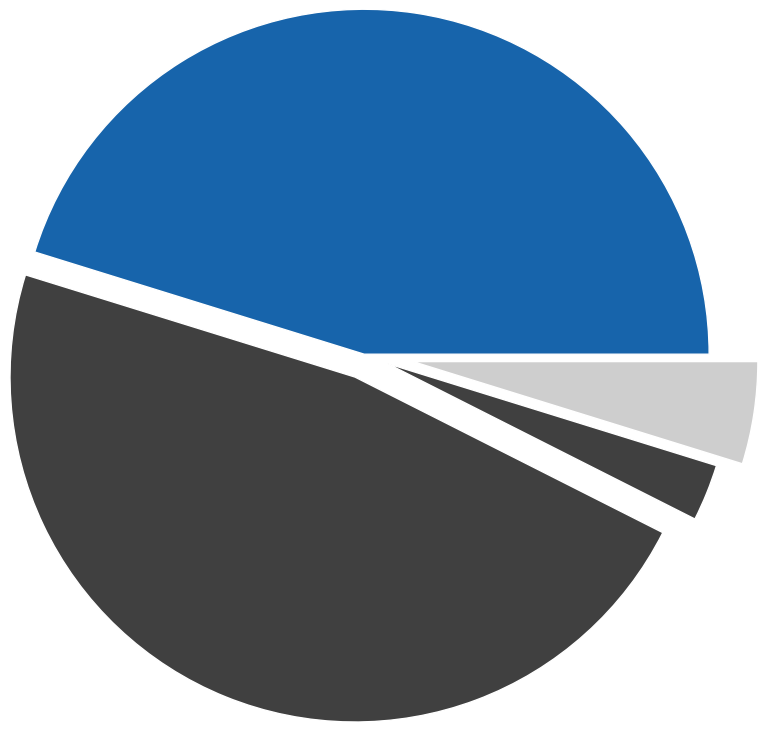

In [180]:
# a pie ploy showing the composition of the focused CBE library
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
mypie, _ = ax.pie([170, 178, 10, 18], radius = 1.4, colors = [plt.cm.Blues(.8), plt.cm.Greys(.8), plt.cm.Greys(.8), plt.cm.Greys(.3)],
                  explode = (0,.1,.1, .2))
# plt.savefig('CBE_focused_composition_pie.pdf', bbox_inches = 'tight', dpi=300)
plt.setp(mypie, edgecolor='white')
plt.show()

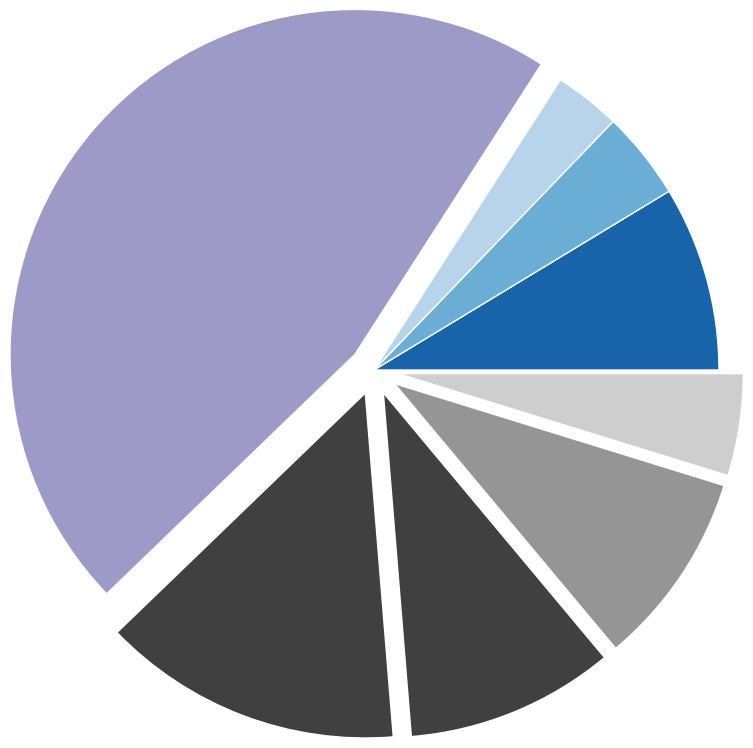

In [181]:
# a pie ploy showing the composition of the focused CBE library
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
mypie, _ = ax.pie([109, 52, 39, 582, 300-123,123, 115, 60], radius = 1.4, colors = [plt.cm.Blues(.8), plt.cm.Blues(.5), plt.cm.Blues(.3), plt.cm.Purples(.5), plt.cm.Greys(.8), plt.cm.Greys(.8),plt.cm.Greys(.5), plt.cm.Greys(.3)],
                  explode = (0,0,0, .1,.1, .1, .1, .1))
# plt.savefig('CBE_focused_composition_pie.pdf', bbox_inches = 'tight', dpi=300)
plt.setp(mypie, edgecolor='white')
plt.show()

In [320]:
# Waterfall plot of the original performance of the ABE validation lib. 

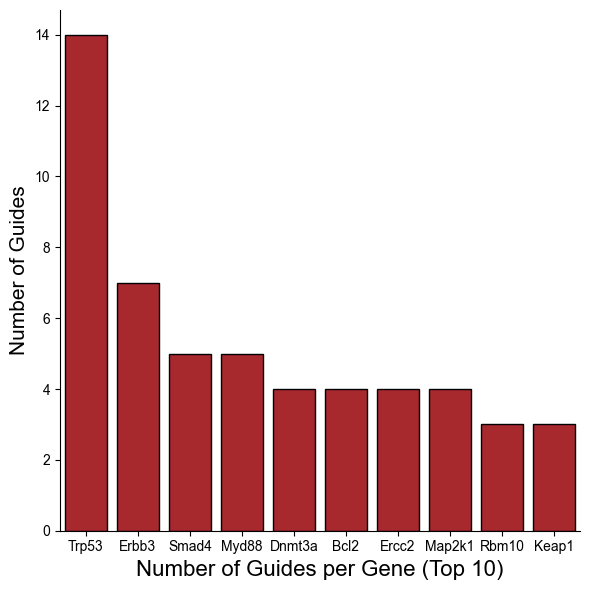

In [182]:
# Histogram showing the number of guides per gene (targeting guides & essential truncation guides)
gene_counts = focused_combined[(focused_combined['Editor']=='ABE') & (focused_combined['classification']=='targeting guide')]['gene_name_m'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=gene_counts.index, y=gene_counts.values, ax=ax,linewidth=1, edgecolor='black', color = plt.cm.Reds(.8))
ax.set_xlabel('Gene', fontsize=15)
ax.set_ylabel('Number of Guides', fontsize=15)
ax.set_xlabel('Number of Guides per Gene (Top 10)', fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

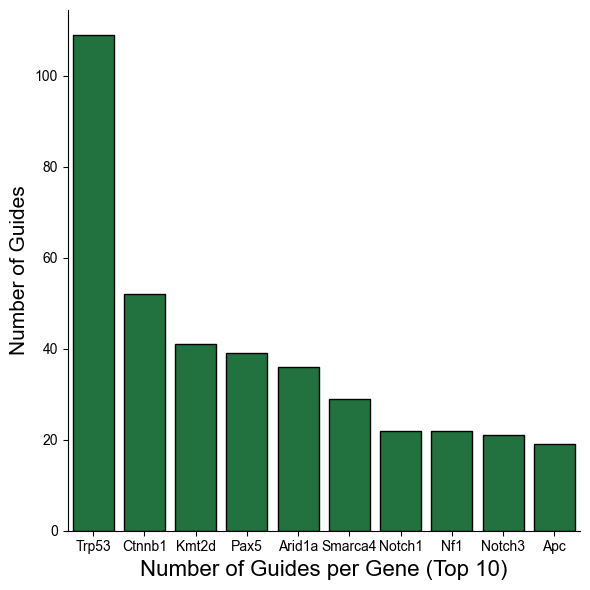

In [183]:
# Histogram showing the number of guides per gene (targeting guides & essential truncation guides)
gene_counts = focused_combined[(focused_combined['Editor']=='CBE') & (focused_combined['classification']=='targeting guide')]['gene_name_m'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=gene_counts.index, y=gene_counts.values, ax=ax,linewidth=1, edgecolor='black', color = plt.cm.Greens(.8))
ax.set_xlabel('Gene', fontsize=15)
ax.set_ylabel('Number of Guides', fontsize=15)
ax.set_xlabel('Number of Guides per Gene (Top 10)', fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()